In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('customer_booking.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 14695: invalid continuation byte

In [4]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1') 
# or try 'ISO-8859-1', 'cp1252' if 'latin-1' doesn't work

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
# Check the distribution of the target variable
print(df['booking_complete'].value_counts())

0    42522
1     7478
Name: booking_complete, dtype: int64


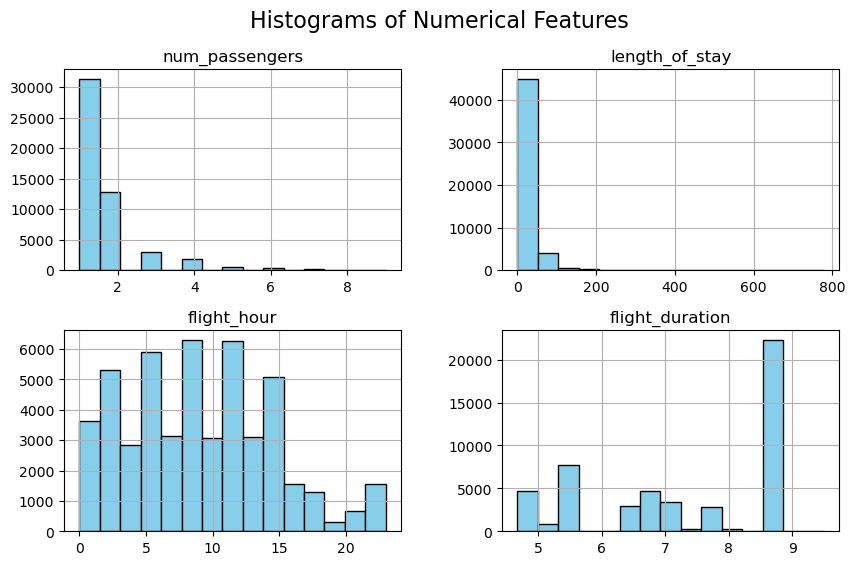

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histograms for numerical features
numerical_features = ['num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_features].hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


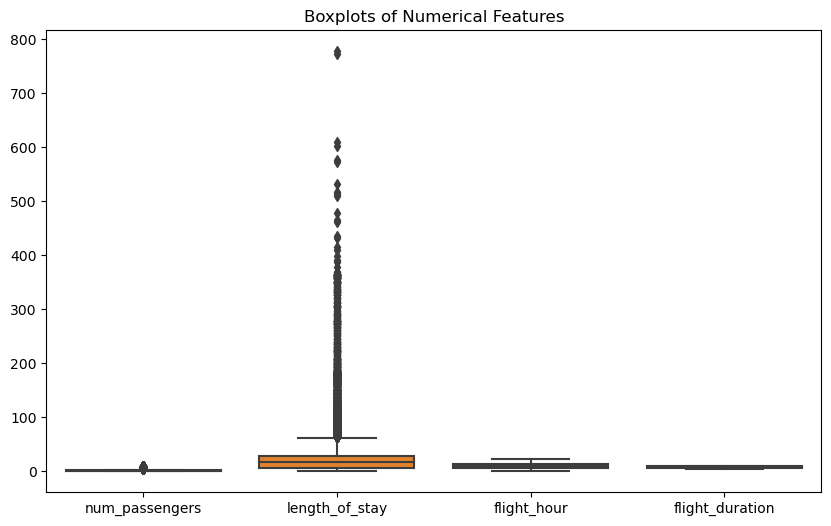

In [12]:
# Boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

In [15]:
#Categorical data

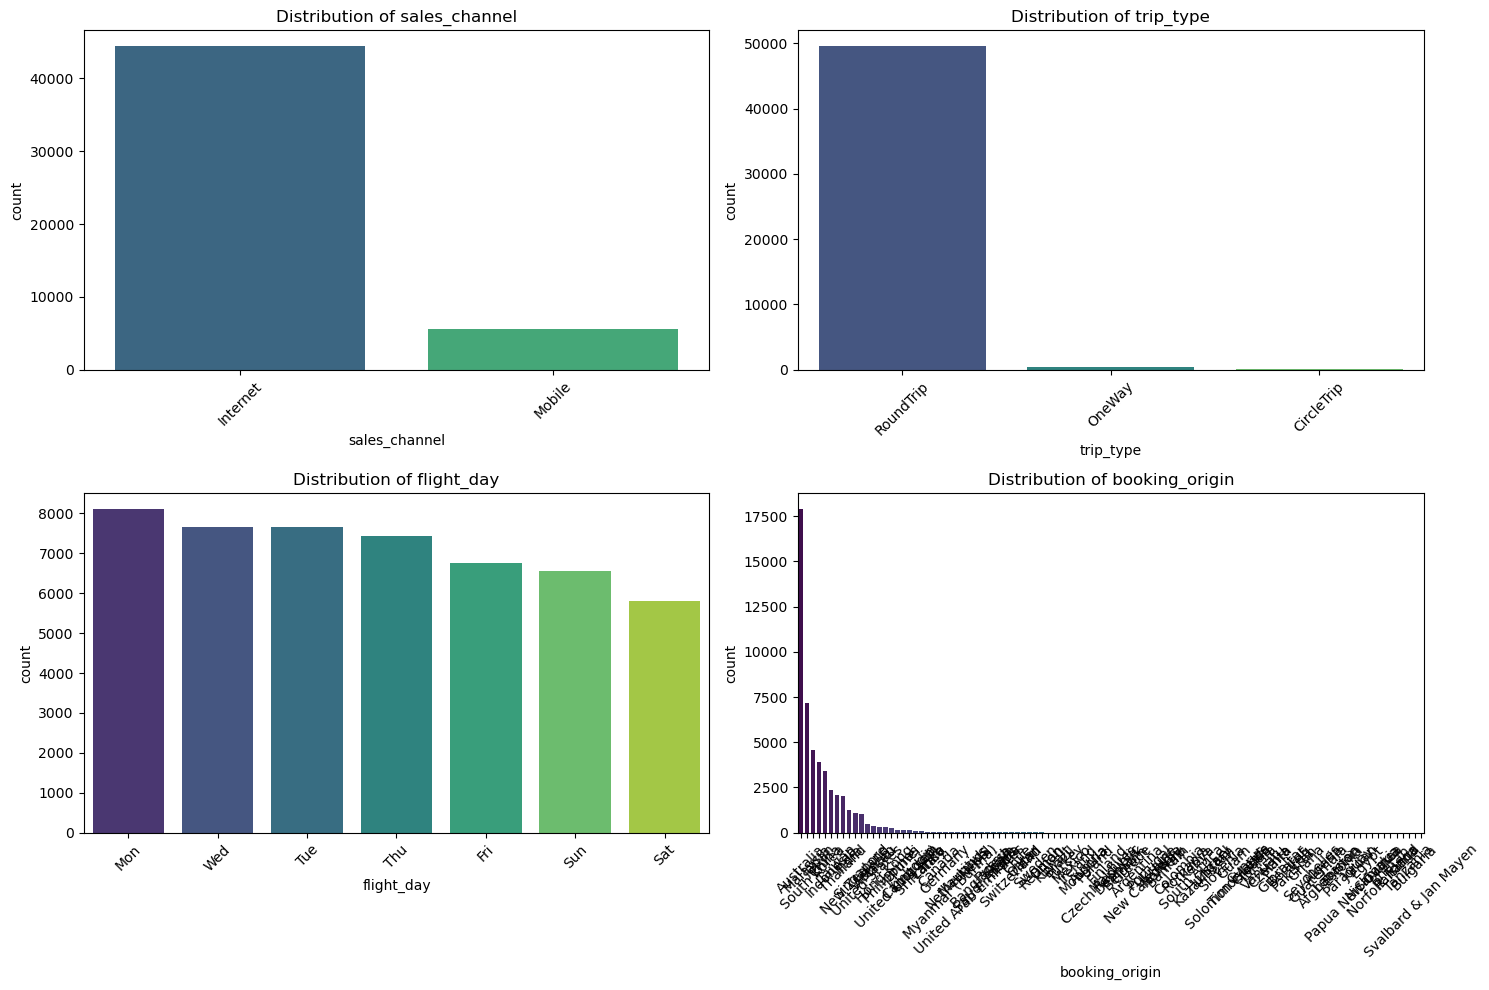

In [16]:
# Count plots for categorical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


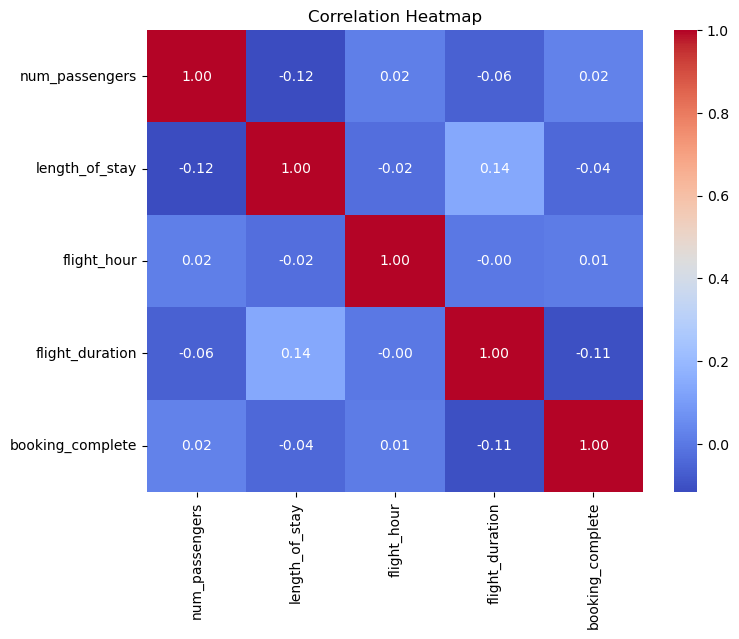

In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features + ['booking_complete']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Iftikhar\AppData\Local\Temp\ipykernel_11292\1154603959.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='flight_day', y='booking_complete', data=df, ci=None, palette='magma')


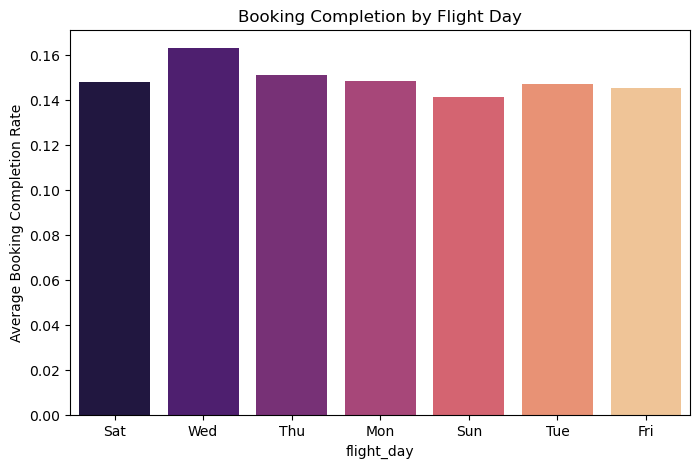

In [18]:
# Booking completion by flight_day
plt.figure(figsize=(8, 5))
sns.barplot(x='flight_day', y='booking_complete', data=df, ci=None, palette='magma')
plt.title('Booking Completion by Flight Day')
plt.ylabel('Average Booking Completion Rate')
plt.show()


C:\Users\Iftikhar\AppData\Local\Temp\ipykernel_11292\3996240985.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales_channel', y='booking_complete', data=df, ci=None, palette='coolwarm')


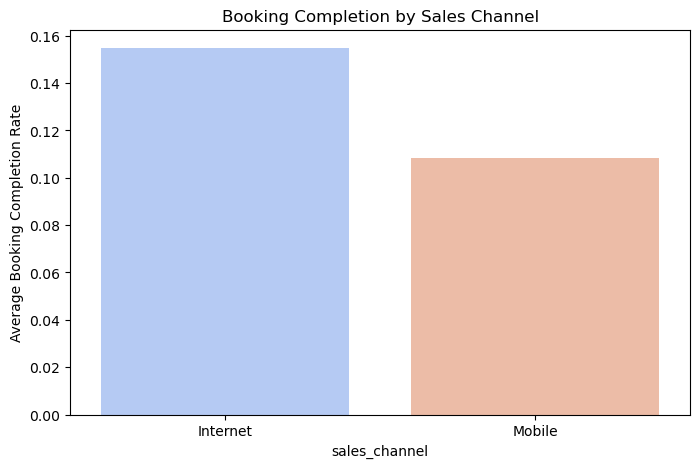

In [19]:
# Booking completion by sales_channel
plt.figure(figsize=(8, 5))
sns.barplot(x='sales_channel', y='booking_complete', data=df, ci=None, palette='coolwarm')
plt.title('Booking Completion by Sales Channel')
plt.ylabel('Average Booking Completion Rate')
plt.show()

C:\Users\Iftikhar\AppData\Local\Temp\ipykernel_11292\345748773.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='trip_type', y='booking_complete', data=df, ci=None, palette='viridis')


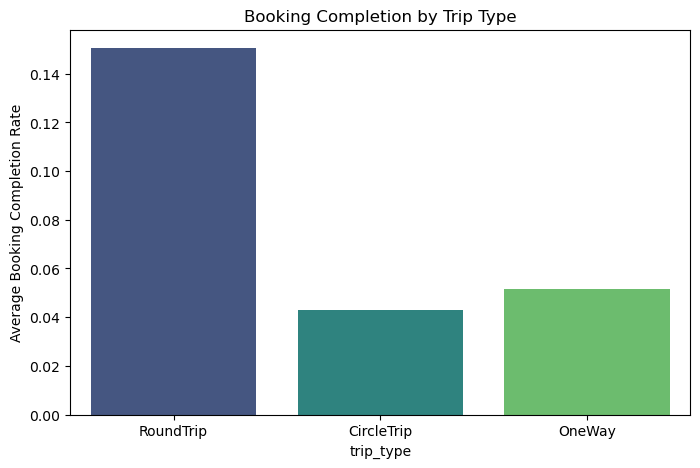

In [20]:
# Booking completion by trip_type
plt.figure(figsize=(8, 5))
sns.barplot(x='trip_type', y='booking_complete', data=df, ci=None, palette='viridis')
plt.title('Booking Completion by Trip Type')
plt.ylabel('Average Booking Completion Rate')
plt.show()

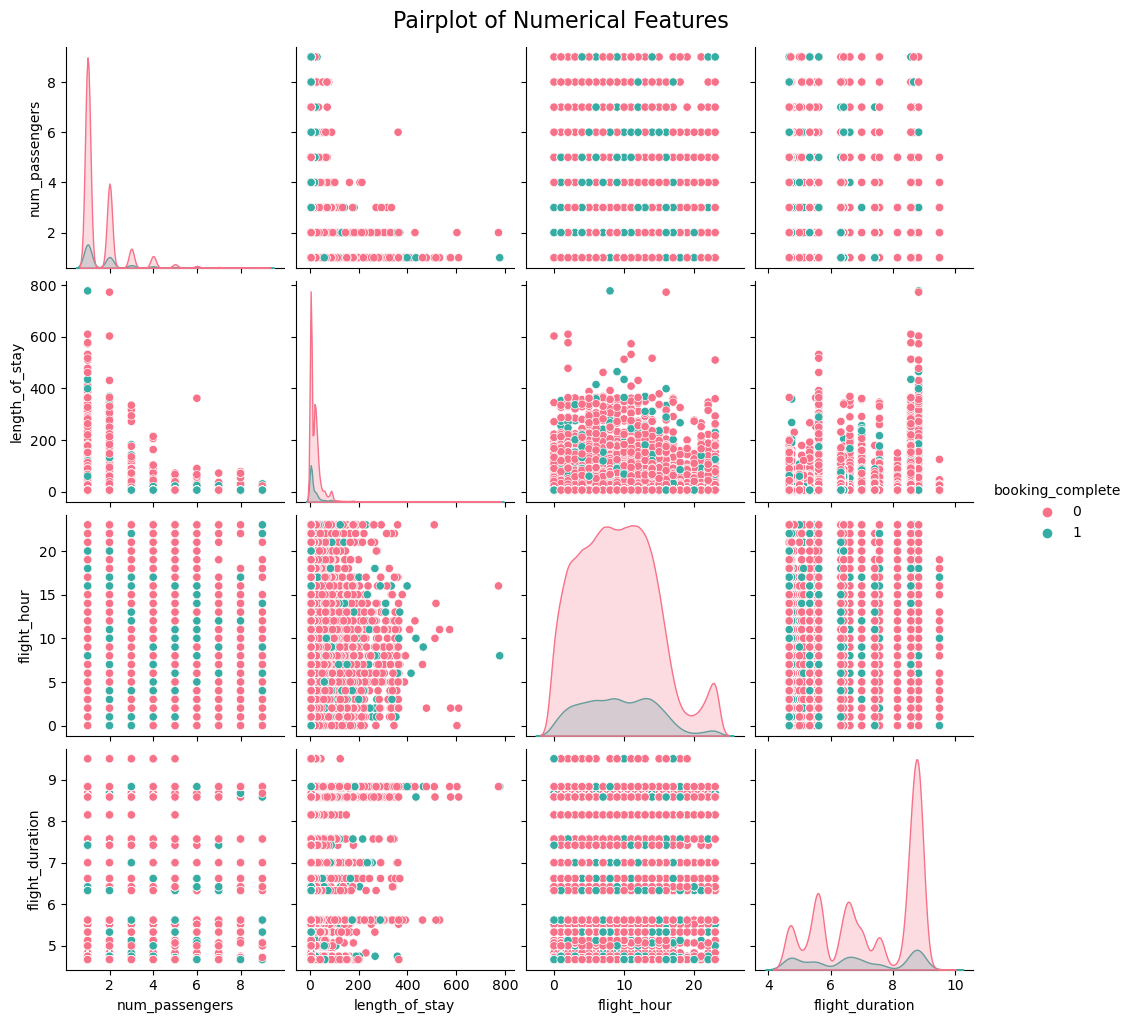

In [21]:
# Pairplot for numerical features
sns.pairplot(df, vars=numerical_features, hue='booking_complete', palette='husl')
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()

In [22]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = data_encoded.drop('booking_complete', axis=1)
y = data_encoded['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (40000, 918)
Testing set size: (10000, 918)


In [24]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

Accuracy Score: 0.8543

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.56      0.12      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



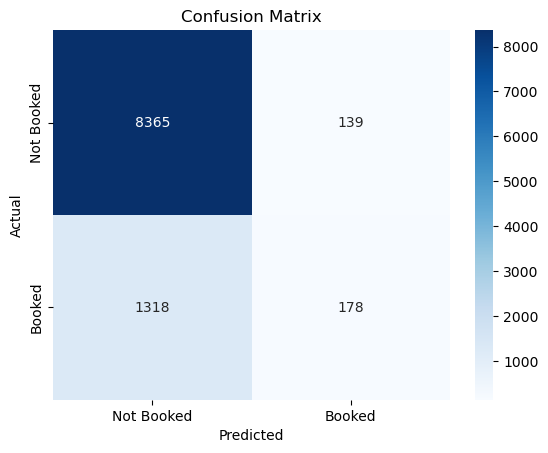

In [25]:
# Evaluate performance on test set
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Booked', 'Booked'], yticklabels=['Not Booked', 'Booked'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


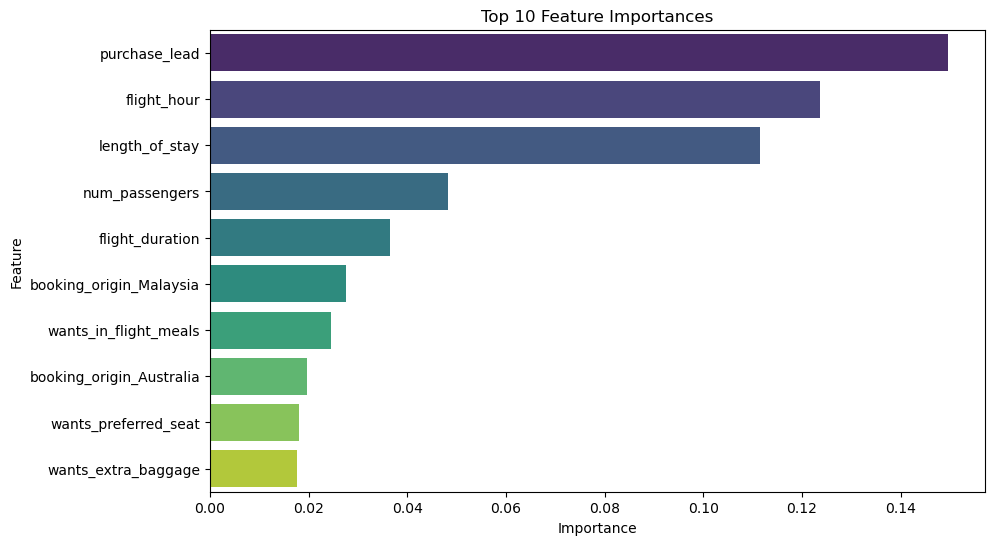

In [26]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

In [27]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

# To load the model later
# loaded_model = joblib.load('random_forest_model.pkl')


['random_forest_model.pkl']

In [28]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Optional: Predict probabilities (if needed)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (booking_complete = 1)

# Show predictions for the first few samples
print("Predicted Classes:\n", y_pred[:10])
print("Predicted Probabilities:\n", y_pred_prob[:10])


Predicted Classes:
 [0 0 0 0 0 0 0 0 0 0]
Predicted Probabilities:
 [0.17 0.01 0.37 0.   0.42 0.2  0.45 0.03 0.01 0.05]


Accuracy: 0.8543
Precision: 0.5615
Recall: 0.1190
F1 Score: 0.1964
ROC-AUC Score: 0.7901


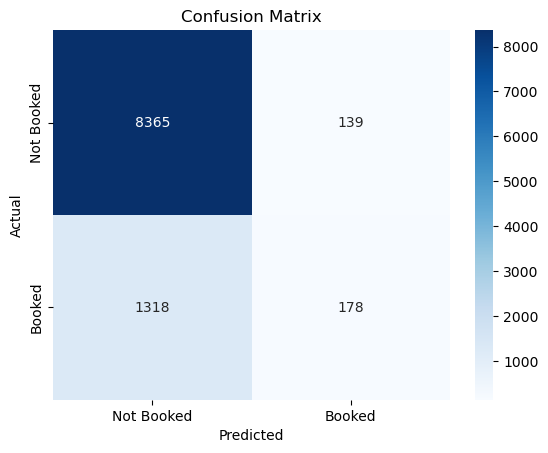

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Booked', 'Booked'], yticklabels=['Not Booked', 'Booked'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'booking_prediction_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [32]:
import joblib
import pandas as pd

# Function to load the model and take user input
def predict_user_input():
    # Step 1: Load the trained model
    print("Loading the trained model...")
    model = joblib.load('booking_prediction_model.pkl')
    print("Model loaded successfully!")
    
    # Step 2: Define the feature list (ensure it matches your dataset's feature columns)
    feature_list = [
        "num_passengers", "sales_channel", "trip_type", "purchase_lead", "length_of_stay", 
        "flight_hour", "flight_day", "route", "booking_origin", 
        "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "flight_duration"
    ]
    
    # Step 3: Collect user input
    print("\nPlease provide the following details:")
    user_data = {}
    for feature in feature_list:
        if feature in ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]:
            user_data[feature] = input(f"{feature} (Enter as text): ")
        else:
            user_data[feature] = float(input(f"{feature} (Enter a numeric value): "))
    
    # Convert the user input into a DataFrame
    user_df = pd.DataFrame([user_data])
    
    # Step 4: Preprocess the data (if needed)
    # Make sure any encoding or scaling applied during training is done here.
    # Example: Encoding categorical variables
    user_df_encoded = pd.get_dummies(user_df)  # Use the same encoding method as your training data

    # Match the feature columns to the training data columns
    trained_columns = model.feature_importances_.shape[0]  # Or use X.columns from training
    user_df_encoded = user_df_encoded.reindex(columns=trained_columns, fill_value=0)
    
    # Step 5: Make the prediction
    prediction = model.predict(user_df_encoded)
    prediction_prob = model.predict_proba(user_df_encoded)[:, 1]
    
    # Step 6: Output the result
    if prediction[0] == 1:
        print("\nPrediction: The customer is likely to make a booking.")
    else:
        print("\nPrediction: The customer is not likely to make a booking.")
    
    print(f"Confidence: {prediction_prob[0]*100:.2f}%")

# Run the function
predict_user_input()


Loading the trained model...
Model loaded successfully!

Please provide the following details:
num_passengers (Enter a numeric value): 5
sales_channel (Enter as text): 65
trip_type (Enter as text): joy
purchase_lead (Enter a numeric value): 200
length_of_stay (Enter a numeric value): 5
flight_hour (Enter a numeric value): 8
flight_day (Enter as text): sun
route (Enter as text): AKLDL
booking_origin (Enter as text): New Zealand
wants_extra_baggage (Enter a numeric value): 2
wants_preferred_seat (Enter a numeric value): 0
wants_in_flight_meals (Enter a numeric value): 1
flight_duration (Enter a numeric value): 5.52


TypeError: 'int' object is not iterable

In [33]:
import pandas as pd
import joblib

def predict_user_input():
    print("Loading the trained model...")
    
    # Load the saved model
    model = joblib.load('booking_prediction_model.pkl')
    print("Model loaded successfully!\n")
    
    # Get user inputs for the most important features
    print("Please provide the following details:")
    try:
        num_passengers = int(input("num_passengers (Enter a numeric value): "))
        sales_channel = input("sales_channel (Enter as text): ")
        trip_type = input("trip_type (Enter as text): ")
        purchase_lead = int(input("purchase_lead (Enter a numeric value): "))
        flight_hour = int(input("flight_hour (Enter a numeric value): "))
        flight_day = input("flight_day (Enter as text): ")
        flight_duration = float(input("flight_duration (Enter a numeric value): "))
    except ValueError as e:
        print(f"Invalid input: {e}")
        return

    # Step 2: Create a DataFrame from the input
    user_data = {
        "num_passengers": [num_passengers],
        "sales_channel": [sales_channel],
        "trip_type": [trip_type],
        "purchase_lead": [purchase_lead],
        "flight_hour": [flight_hour],
        "flight_day": [flight_day],
        "flight_duration": [flight_duration]
    }
    user_df = pd.DataFrame(user_data)

    # Step 3: Encode the input to match training data
    trained_columns = model.feature_names_in_  # Use the column names saved in the model
    user_df_encoded = pd.get_dummies(user_df)

    # Reindex to match the training data columns
    user_df_encoded = user_df_encoded.reindex(columns=trained_columns, fill_value=0)

    # Step 4: Make the prediction
    prediction = model.predict(user_df_encoded)
    prediction_prob = model.predict_proba(user_df_encoded)[:, 1]  # Probability for class 1

    # Step 5: Display the prediction
    if prediction[0] == 1:
        print("Prediction: Booking will be completed.")
    else:
        print("Prediction: Booking will not be completed.")
    print(f"Confidence: {prediction_prob[0]*100:.2f}%")

# Run the function
predict_user_input()



Loading the trained model...
Model loaded successfully!

Please provide the following details:
num_passengers (Enter a numeric value): 5
sales_channel (Enter as text): 54
trip_type (Enter as text): RoundTrip
purchase_lead (Enter a numeric value): 35
flight_hour (Enter a numeric value): 8
flight_day (Enter as text): sun
flight_duration (Enter a numeric value): 9
Prediction: Booking will not be completed.
Confidence: 5.00%
